In [1]:
import numpy as np
import pandas as pd
%pylab inline
plt.xkcd()


Populating the interactive namespace from numpy and matplotlib


In [172]:
size = 2000


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


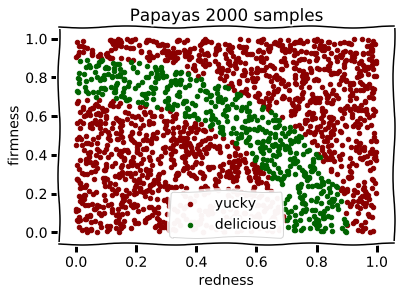

In [175]:
a = np.random.uniform(0,1,size=[size,2])
T = pd.DataFrame(a)
T =T.rename(columns={0:'redness',1:'firmness'})
T['val'] = (np.sqrt(T.redness**2 + T.firmness**2))
T['delicious'] = (T.val.between(0.7,0.9)  )
ax = T[T.delicious==0].plot.scatter(x='redness',y='firmness',label='yucky',color='DarkRed')
T[T.delicious==1].plot.scatter(x='redness',y='firmness',label='delicious',ax=ax,color='DarkGreen',title="Papayas {size} samples".format(size=size))

In [115]:
T
import seaborn as sns

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


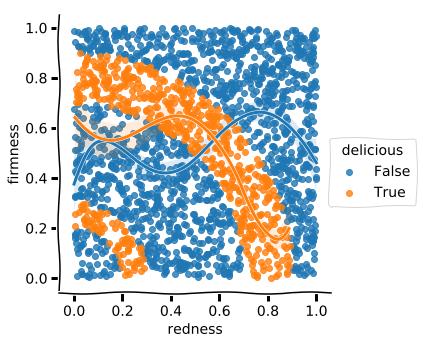

In [174]:
sns.lmplot(data=T,x='redness',y='firmness',hue='delicious',order=5,truncate=True,ci=99)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


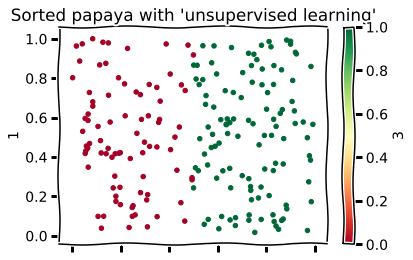

In [143]:
Z = pd.DataFrame(np.random.uniform(0,1,size=[200,3]))
Z[3] = (Z[0]>0.5).astype(int)
Z.plot.scatter(x=0,y=1,c=3,cmap='RdYlGn',legend=False,title="Sorted papaya with 'unsupervised learning'")

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm


In [119]:

T = T.sample(frac=1)

In [137]:
size =1000

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


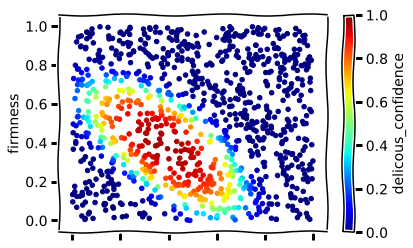

In [140]:
L = svm.SVC(kernel='rbf',probability=True,)

T = T.sample(frac=1)
model = L.fit(T[:size][['redness','firmness']],y=T[:size].delicious)
T['prediction'] = model.predict(T[['redness','firmness']])
T['probs'] = model.predict_proba(T[['redness','firmness']])[:,1]
T['delicous_confidence'] = model.predict_proba(T[['redness','firmness']])[:,1]
T.plot.scatter(x='redness',y='firmness',c='delicous_confidence',cmap='jet',vmin=0,vmax=1)

In [141]:
print(classification_report(y_true=T.delicious.values,y_pred=T.prediction.values))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89       800
          1       0.00      0.00      0.00       200

avg / total       0.64      0.80      0.71      1000



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [190]:
uncertainty = lambda x: np.abs(x-0.5)*2

In [193]:
T['certainty'] = T.probs.apply(uncertainty)

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


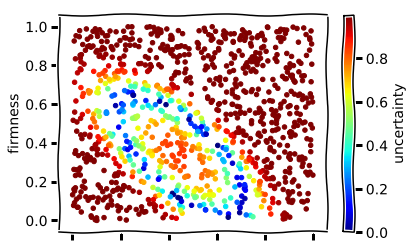

In [194]:
T.plot.scatter(x='redness',y='firmness',c='uncertainty',cmap='jet')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


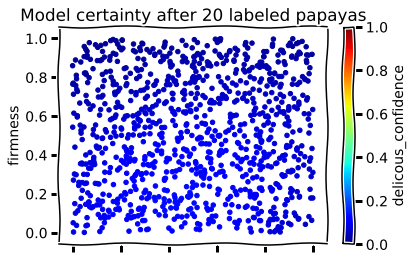

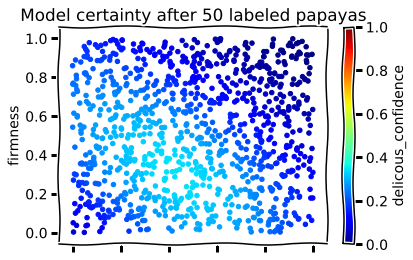

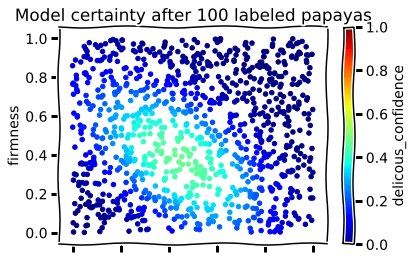

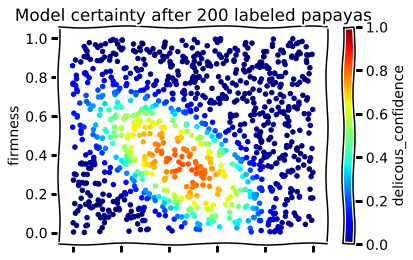

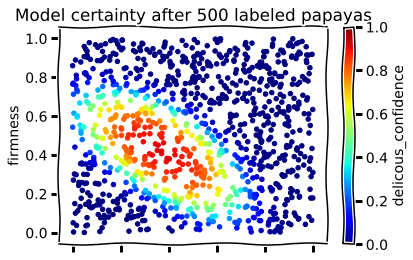

In [18]:
for size in [20,50,100,200,500]:
    L = svm.SVC(kernel='rbf',probability=True)
    title = "Model certainty after {size} labeled papayas".format(size=size)
    model = L.fit(T[:size][['redness','firmness']],y=T[:size].delicious)
    T['delicous_confidence'] = model.predict_proba(T[['redness','firmness']])[:,1]
    T.plot.scatter(x='redness',y='firmness',c='delicous_confidence',cmap='jet',title=title,vmin=0,vmax=1)

In [54]:
def plot_scatter(d):
    mkr_dict = {True:'x',False:'*'}
    for val in d.used.unique():
          plt.scatter(d.redness, d.firmness, 
                s = 50+25*int(val),
                c = d.delicous_confidence if val else 'black', 
                marker = mkr_dict[val])
  
    

/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.5/dist-packages/matplotlib/fon

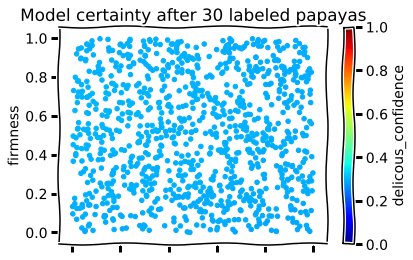

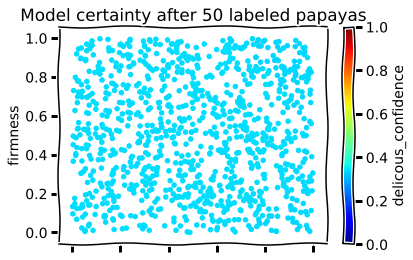

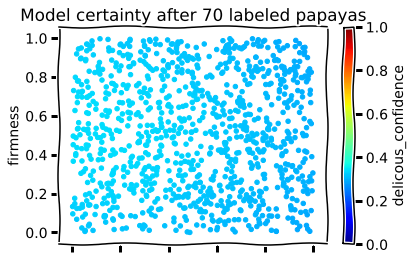

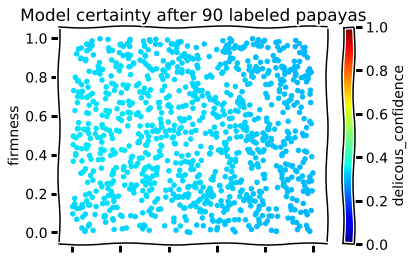

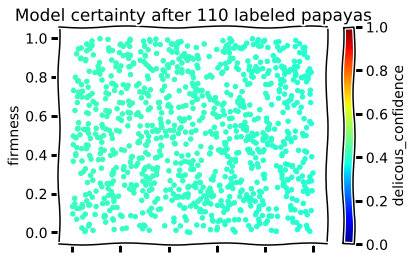

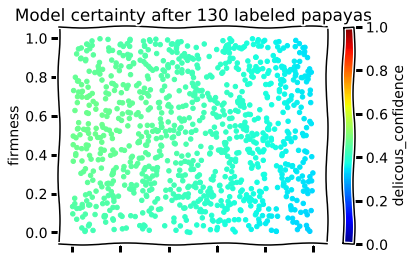

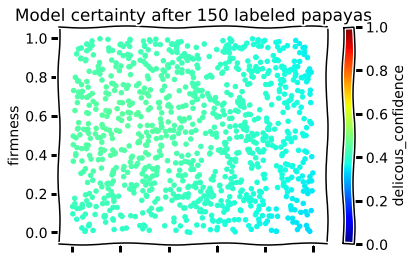

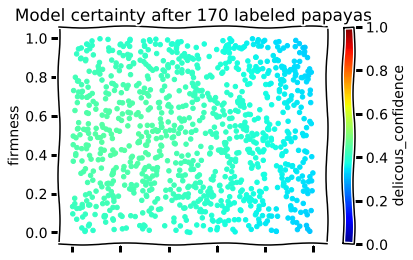

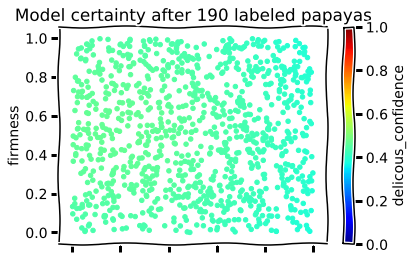

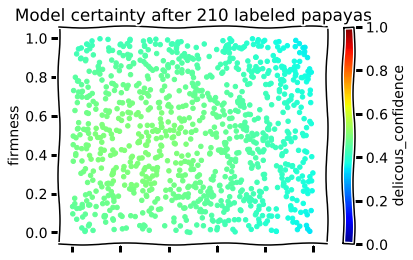

In [159]:

T['used']= False
T=T.sample(frac=1)
T['certainty'] = 0.5
T['used'] = False
Labels = T[:10]
amt = 20
tracker = []
count =0
for size in range(10):
    for step in range(amt):
        count+=1
        T = T.sort_values(by=['used','certainty'],ascending=[True,True])
        T[:1].used = True
        next_labels = T[:1]
        next_labels['step'] = count
        Labels = Labels.append(next_labels).drop_duplicates()
        L = svm.SVC(kernel='rbf',probability=True,)
        title = "Model certainty after {size} labeled papayas".format(size=len(Labels))
        model = L.fit(Labels[['redness','firmness']],y=Labels.delicious)
        T['probs'] = model.predict_proba(T[['redness','firmness']])[:,1]
        T['certainty'] = T.probs.apply(lambda x: np.abs(0.5-x))
        
        T['prediction'] = model.predict(T[['redness','firmness']])
        T['delicous_confidence'] = T['probs']
        tracker.append({"labels":len(Labels),
                        "accuracy":accuracy_score(y_true=T.delicious,y_pred=T.prediction.values),
                        "f1":f1_score(y_true=T.delicious,y_pred=T.prediction.values)
                       })
    
    
    T.plot.scatter(x='redness',y='firmness',c='delicous_confidence',cmap='jet',title=title,legend=False,vmin=0,vmax=1)
    
    

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


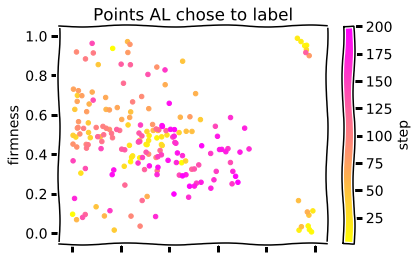

In [155]:
Labels.plot.scatter(x='redness',y='firmness',c='step',cmap='spring_r',title="Points AL chose to label",legend=False,)


In [158]:
f1_score(y_true=T.delicious,y_pred=T.prediction.values)

0.5401174168297456

In [157]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score

In [156]:
print(classification_report(y_true=T.delicious.values,y_pred=T.prediction.values))

             precision    recall  f1-score   support

          0       0.91      0.78      0.84       800
          1       0.44      0.69      0.54       200

avg / total       0.82      0.77      0.78      1000



In [106]:
print(confusion_matrix(y_true=T.delicious.values,y_pred=T.prediction.values))

[[207 612]
 [  1 180]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  


/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


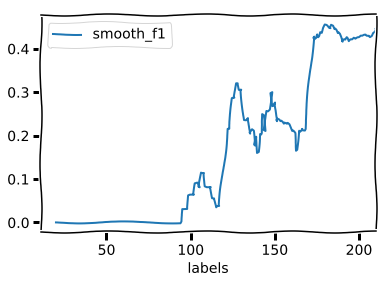

In [164]:
D = pd.DataFrame(tracker)
D['smooth_f1'] = pd.rolling_mean(D.f1,10)
D.plot(x='labels',y='smooth_f1')

In [148]:
Z = pd.DataFrame()

Z['delicious_examples'] = Labels.delicious.cumsum()
Z = Z.reset_index()
del Z['index']
Z['yucky_examples'] = Z.index - Labels.delicious.cumsum() 

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


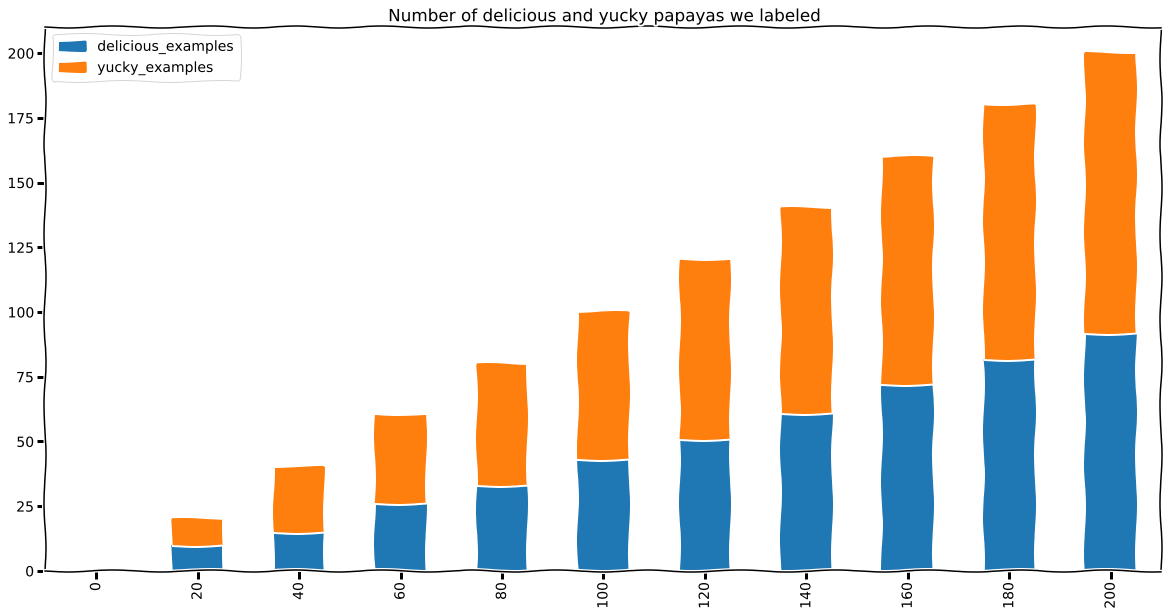

In [149]:
Z[:210:20].plot.bar(stacked=True,figsize=(20,10),title="Number of delicious and yucky papayas we labeled")

In [388]:
Labels.delicious.value_counts()

0    398
1      4
Name: delicious, dtype: int64